In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline



In [5]:
df = pd.read_csv("Downloads/train_ctrUa4K.csv")

In [6]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

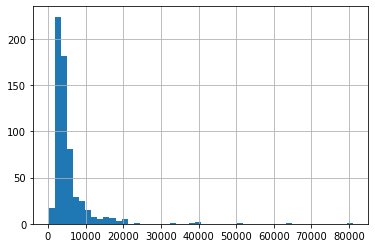

In [9]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

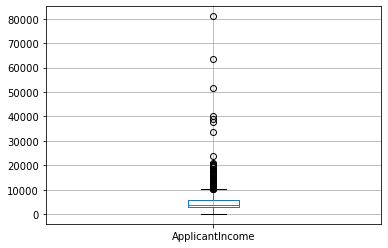

In [10]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

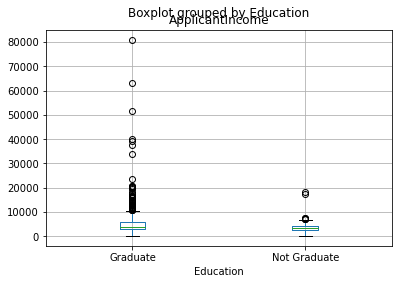

In [11]:
df.boxplot(column='ApplicantIncome', by='Education')

<AxesSubplot:>

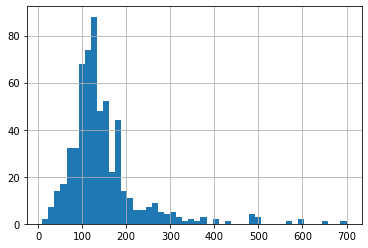

In [12]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

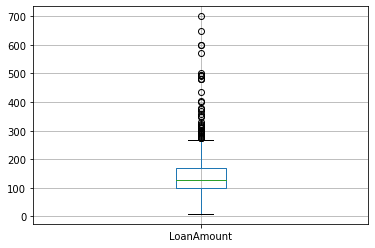

In [13]:
df.boxplot(column="LoanAmount")

In [14]:
#Categorical variable analysis
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan')

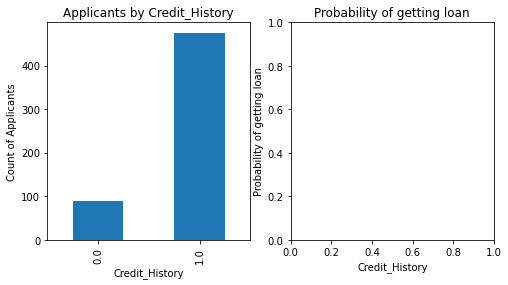

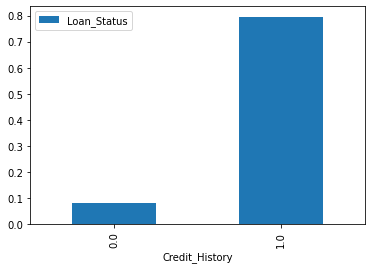

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan")

<AxesSubplot:xlabel='Credit_History'>

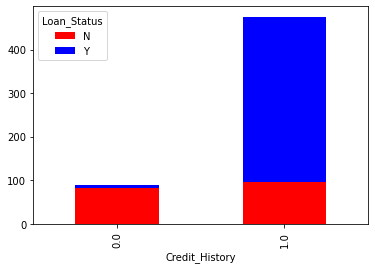

In [16]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [17]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [32]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [34]:
df['LoanAmount'].isnull().sum()

0

In [33]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df['Self_Employed'].fillna('No',inplace=True)

In [22]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [ ]:
df['Gender'].isnull().sum()

In [ ]:
df['Gender']

In [ ]:
df['Gender'].fillna('Null',inplace=True)

In [ ]:
df['Gender'].isnull().sum()

In [40]:
df['Credit_History'].isnull().sum()

0

In [ ]:

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['Credit_History'].fillna(df[df['Credit_History'].isnull()].apply(fage, axis=1), inplace=True)

In [ ]:
df['Credit_History'].isnull().sum()

In [ ]:
df['Credit_History']

In [ ]:
df

In [ ]:
df['Education']

In [39]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [126]:
from sklearn.linear_model import LogisticRegression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

NameError: name 'classification_model' is not defined

In [55]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder_x=LabelEncoder()


In [ ]:
df.head()

In [115]:
x=df.iloc[:,[12]].values

In [122]:
x

array([['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
      

In [116]:
y=df.iloc[:,[10]].values

In [69]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [70]:
x[:,0]=label_encoder_x.fit_transform(x[:,0])

In [71]:
onehotencoder=OneHotEncoder(categories=[0])

In [72]:
label_encoder_y=LabelEncoder()

In [73]:
y=label_encoder_y.fit_transform(y)

C:\Users\PROFESSIONAL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(df[['Dependents']],df.Credit_History,test_size=0.1)

In [74]:
#X_test

In [75]:
#X_train

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [77]:
#label_encoder_y=LabelEncoder()

In [84]:
#model.fit(X_train,y_train)
#model.predict(X_test)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5)

In [80]:
from sklearn.linear_model import LogisticRegression
Model1=LogisticRegression()
Model1.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_predict=Model1.score(x_test,y_test)

In [82]:
Model1.score(x_test,y_test)

0.8432432432432433

In [291]:
def preprocessor(data):
    res_def=data.copy()
    le=LabelEncoder()
    res_def['Loan_ID']=le.fit_transform(res_def['Loan_ID'])
    res_def['Gender']=le.fit_transform(res_def['Gender'])
    res_def['Married']=le.fit_transform(res_def['Married'])
    res_def['Dependents']=le.fit_transform(res_def['Dependents'])
    res_def['Education']=le.fit_transform(res_def['Education'])
    res_def['Self_Employed']=le.fit_transform(res_def['Self_Employed'])
    res_def['ApplicantIncome']=le.fit_transform(res_def['ApplicantIncome'])
    res_def['CoapplicantIncome']=le.fit_transform(res_def['CoapplicantIncome'])
    res_def['LoanAmount']=le.fit_transform(res_def['LoanAmount'])
    res_def['Loan_Amount_Term']=le.fit_transform(res_def['Loan_Amount_Term'])
    res_def['Credit_History']=le.fit_transform(res_def['Credit_History'])
    res_def['Property_Area']=le.fit_transform(res_def['Property_Area'])
    res_def['Loan_Status']=le.fit_transform(res_def['Loan_Status'])

    return res_def

In [295]:
encoded_df=preprocessor(df)
encoded_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [294]:
x=encoded_df.drop('Credit_History',axis=1).values #row vise
y=encoded_df['Credit_History'].values #column vise

In [296]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [297]:
#decision tree with depth 2
model_dt_2=DecisionTreeClassifier(random_state=1,max_depth=2) #random state any no. due to 1 whenever we run it take same sample
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train,y_train)
model_dt_2_score_test=model_dt_2.score(x_test,y_test)
print("Training score",model_dt_2_score_train)
print("Testing score",model_dt_2_score_test)

Training score 0.8635437881873728
Testing score 0.8130081300813008


In [298]:
#decision tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4) #random state any no. due to 1 whenever we run it take same sample
model_dt_4.fit(x_train,y_train)
model_dt_4_score_train=model_dt_4.score(x_train,y_train)
model_dt_4_score_test=model_dt_4.score(x_test,y_test)
print("Training score",model_dt_4_score_train)
print("Testing score",model_dt_4_score_test)

Training score 0.9022403258655805
Testing score 0.8211382113821138


In [299]:
#decision tree with depth 6
model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6) #random state any no. due to 1 whenever we run it take same sample
model_dt_6.fit(x_train,y_train)
model_dt_6_score_train=model_dt_6.score(x_train,y_train)
model_dt_6_score_test=model_dt_6.score(x_test,y_test)
print("Training score",model_dt_6_score_train)
print("Testing score",model_dt_6_score_test)

Training score 0.9511201629327902
Testing score 0.8048780487804879


In [300]:
#decision tree with depth 8
model_dt_8=DecisionTreeClassifier(random_state=1,max_depth=8) #random state any no. due to 1 whenever we run it take same sample
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train,y_train)
model_dt_8_score_test=model_dt_8.score(x_test,y_test)
print("Training score",model_dt_8_score_train)
print("Testing score",model_dt_8_score_test)

Training score 0.9857433808553971
Testing score 0.7886178861788617


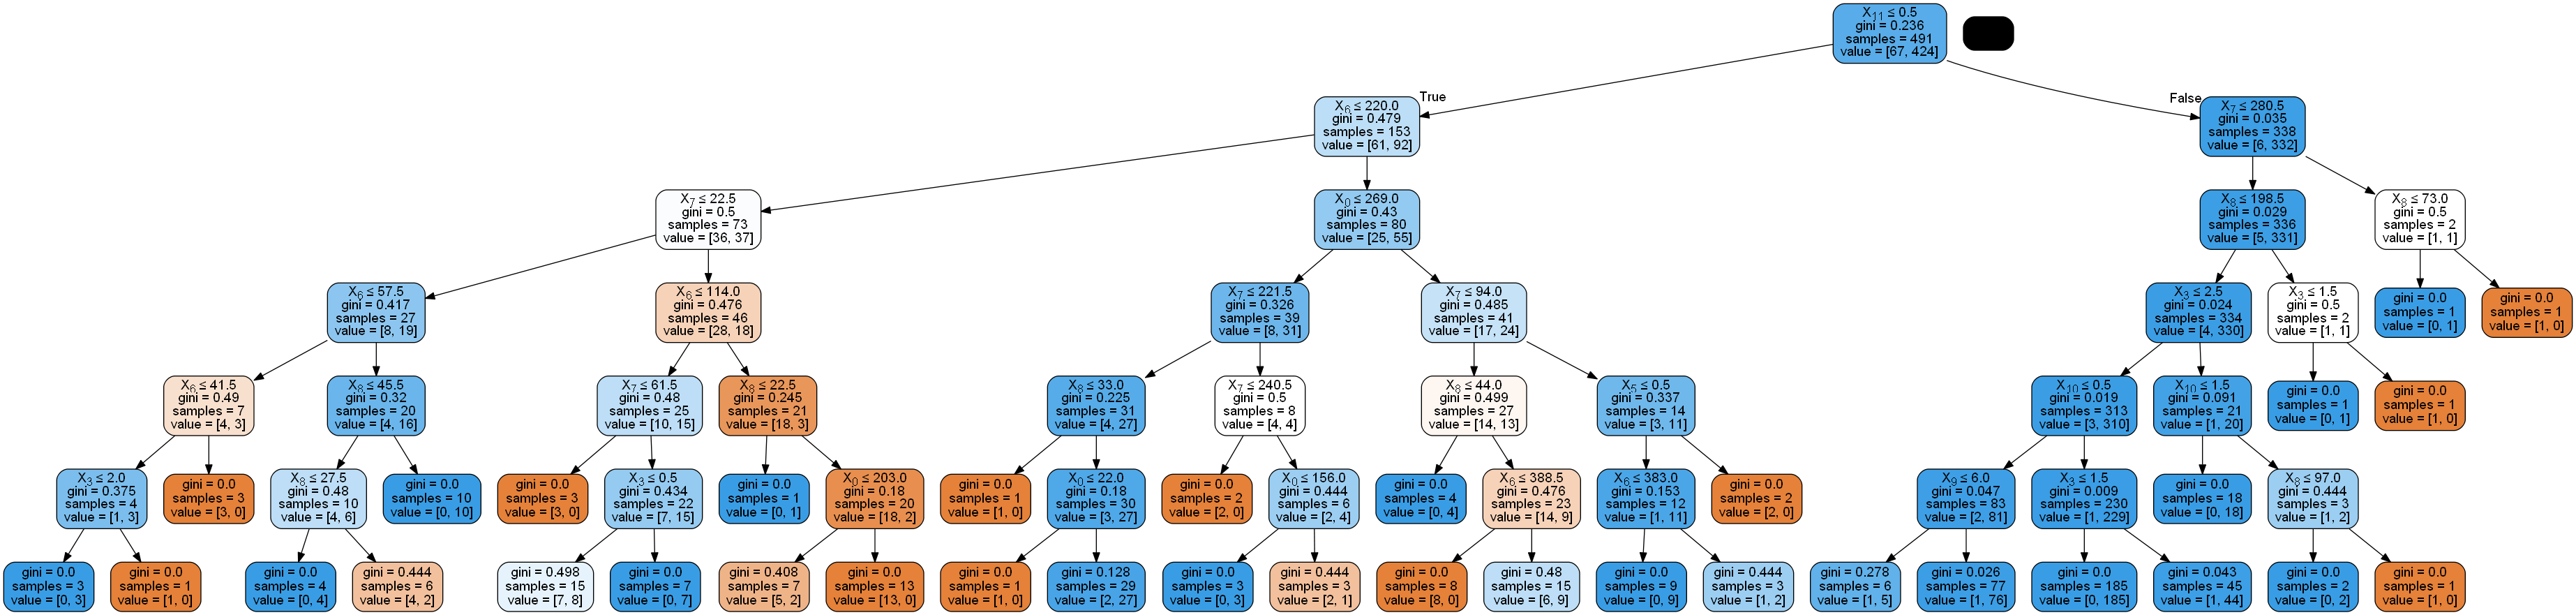

<Figure size 720x1440 with 0 Axes>

In [301]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
plt.figure(figsize=(10,20))
dot_data=StringIO()
export_graphviz(model_dt_6,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [302]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [303]:
y_pred= classifier.predict(x_test)  

In [304]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [305]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [306]:
cm

array([[ 9, 13],
       [ 8, 93]], dtype=int64)